# Get ready

First, download, import, prep packages and such. 

Then, check the file location and import the .csv files. Remove any with empty text fields. 

Save a data frame with all the texts and another with only those texts that mention the keywords of interest. 

In [1]:
%%capture

# installing necessary pdf conversion packages via pip
# the '%%capture' at the top of this cell suppresses the output (which is normally quite long and annoying looking). 
# You can remove or comment it out if you prefer to see the output. 
!pip install nltk
!pip install spacy -q
!python -m spacy download en_core_web_lg -q


In [2]:
%%capture

import os                         # os is a module for navigating your machine (e.g., file directories).
import nltk                       # nltk stands for natural language tool kit and is useful for text-mining. 
from nltk import word_tokenize    # and some of its key functions
from nltk import sent_tokenize  
tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.corpus import wordnet                    # Finally, things we need for lemmatising!
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
nltk.download('averaged_perceptron_tagger')        # Like a POS-tagger...
nltk.download('wordnet')
nltk.download('webtext')
from nltk.corpus import webtext

import pandas as pd
pd.set_option('display.max_colwidth', 200)
import numpy as np
import statistics
import datetime
date = datetime.date.today()

import codecs
import csv                        # csv is for importing and working with csv files

from collections import Counter

import statistics
import re                         # things we need for RegEx corrections
import matplotlib.pyplot as plt
import string 
import spacy 
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 
nlp = spacy.load('en_core_web_lg')
nlp.max_length = 1500000 #or any large value, as long as you don't run out of RAM

import math 

English_punctuation = "-!\"#$%&()'*-–+,./:;<=>?@[\]^_`{|}~''“”"      # Things for removing punctuation, stopwords and empty strings
table_punctuation = str.maketrans('','', English_punctuation)

In [3]:
print(os.listdir("..\\results")  )

files = []
def import_results(input):
    for f in os.listdir(input):
        f = pd.read_csv(input + '\\'+ f,encoding='latin1')
        files.append(f)
    output = pd.concat(files)
    return output

['ESHG2001abstractICHG.csv', 'ESHG2002Abstracts.csv', 'ESHG2003Abstracts.csv', 'ESHG2004.csv', 'ESHG2005Abstracts.csv', 'ESHG2006Abstracts.csv', 'ESHG2007Abstracts.csv', 'ESHG2008Abstracts.csv', 'ESHG2009Abstracts.csv', 'ESHG2010Abstracts.csv', 'ESHG2011Abstracts.csv', 'ESHG2012Abstracts.csv', 'ESHG2013Abstracts.csv', 'ESHG2014Abstracts.csv', 'ESHG2015Abstracts.csv', 'ESHG2016Abstracts.csv', 'ESHG2017 electronic posters.csv', 'ESHG2017 oral presentation.csv', 'ESHG2018 electronic posters.csv', 'ESHG2018 oral presentation.csv', 'ESHG2019 electronic posters.csv', 'ESHG2019 oral presentation.csv', 'ESHG2020 electronic posters.csv', 'ESHG2020 oral presentation.csv', 'ESHG2021 electronic posters.csv', 'ESHG2021 oral presentation.csv']


In [4]:
all_results = import_results("..\\results")
len(all_results)

34630

In [5]:
year_04 = pd.read_csv('..\\results\\ESHG2004.csv')
year_04 = year_04.iloc[:, [0,1]]
year_04

,Year,Text
0,2004,"L01Multiple Sulfatase Defi ciency: Molecular defect and properties of the autosomal forms of epigenetic mosaicism can be caused by missing enzyme. retrotransposon activity. K. von Figura, M. Maria..."
1,2004,L04Regional differences in genetic testing and counselling in Europe - An overview
2,2004,"L02Biogenesis of mitochondria: Human diseases linked to S. Aymé protein transport, folding and degradation INSERM, Paris, France. W. Neupert"
3,2004,L05Hereditary Breast/Ovarian Cancer risk: international energy present in oxidizable substrates is transduced into energy comparison of the acceptability of Preventive strategies stored in ATP. Mi...
4,2004,L06Variation in prenatal counselling in Europe: the example of highly motile within the cell. Quite a number of genes are involved Klinefelter in these processes which are closely linked to the in...
...,...,...
2200,2004,"C7 A10 in the aetiology of cystinuria, we could not identify any Affected children may have only one episode of illness or multiple mutation in SL"
2201,2004,"C7 A10 in the two families. Nevertheless, there remains recurrences. A common mutation (985A >G) has been identiÜed the possibility that other genes are involved in cystinuria. Further among pa..."
2202,2004,"P0845Inactivation of the spasmolytic trefoil peptide (Tff2) leads In this study, two unrelated MCAD patients, compound heterozygous to increased expression of additional gastroprotective factors..."
2203,2004,"P0843MCDR1 Locus - Screening for candidate genes. functional disturbance in stomach and gut, Tff2-/- constructs do N. Udar1, M. Chalukya1, R. Silva-Garcia1, J. Yeh1, P. Wong1,2, K. Small1 not di..."


In [6]:
all_results = pd.concat([all_results, year_04])
len(all_results)

36835

In [7]:
no_null_texts = all_results[~all_results['Text'].isnull()]
len(no_null_texts)

36184

In [8]:
matched_texts = no_null_texts[no_null_texts['Text'].str.contains('autis|Autis|ASD|Asperger|asperger')]
len(matched_texts)

929

# Sent tokenisation

In [9]:
sentences  = [sent_tokenize(abstract) for abstract in matched_texts['Text'] ] # make tokenized sentences list
matched_texts['Sentence'] = sentences                                         # copy that list back into df as a new column
matched_texts = matched_texts.explode('Sentence')                             # explode to create 1 row per sentence token


C:\Users\mzyssjkc\AppData\Local\Temp\ipykernel_17892\740089231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_texts['Sentence'] = sentences                                         # copy that list back into df as a new column


In [10]:
matched_sents = matched_texts[matched_texts['Sentence'].str.contains('autis|Autis|ASD|Asperger|asperger')]
                                                                            # keep only those rows that contain the keywords
matched_sents = matched_sents.drop_duplicates()                             # drop any duplicates
len(matched_sents)                                                          # check length of remaining data frame

2092

## Person-first pattern

In [11]:
pattern_2 = [{"POS": "NOUN"},
             {'LOWER': 'with'},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {"TEXT": {"REGEX": "^[Aa]utism$"}}]

pattern_3 = [{"POS": "NOUN"},
             {'LOWER': 'with'},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {"TEXT": {"REGEX": "^[Aa]sperger$"}}]

pattern_4 = [{"POS": "NOUN"},
             {'LOWER': 'with'},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {"TEXT": {"REGEX": "^ASD$"}}]

# Matcher class object 
matcher = Matcher(nlp.vocab) 
matcher.add("matching_1", [pattern_2, pattern_3, pattern_4]) 

In [12]:
def find_pattern1_match(input):
    thingy = nlp(input)
    match = matcher(thingy)
    if match == []:
        out_value = ''
    else:
        hold_multi_spans = []
        for match_id, start, end in match:
                string_id = nlp.vocab.strings[match_id]  # Get string representation
                span = thingy[start:end]  # The matched span
                hold_multi_spans.append(span)
        out_value = hold_multi_spans
    return out_value



In [13]:
matched_sents['Person-first'] = matched_sents.apply(lambda row: find_pattern1_match(row.Sentence), axis = 1)


## Identity first pattern

In [14]:
pattern_a = [{"TEXT": {"REGEX": "^[Aa]utistic"}},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {"POS": "NOUN"}]

pattern_b = [{"TEXT": {"REGEX": "^[Aa]sperger"}},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {"POS": "NOUN"}]

pattern_c = [{"TEXT": {"REGEX": "^ASD"}},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {'DEP':'amod', 'OP':"?"},
             {"POS": "NOUN"}]

# Matcher class object 
matcher = Matcher(nlp.vocab) 
matcher.add("matching_2", [pattern_a, pattern_b, pattern_c]) 


In [15]:
matched_sents['Identity-first'] = matched_sents.apply(lambda row: find_pattern1_match(row.Sentence), axis = 1)

In [16]:
len(matched_sents)

2092

In [17]:
matched_sents = matched_sents.explode('Person-first')                             # explode to create 1 row per sentence token
len(matched_sents)

2094

In [18]:
matched_sents = matched_sents.explode('Identity-first')                             # explode to create 1 row per sentence token
len(matched_sents)

2131

In [19]:
final = matched_sents[(matched_sents['Person-first'] != '') | (matched_sents['Identity-first'] != '')]
len(final)

728

In [20]:
final

,Title,Session_Code,Authors_and_Affiliations,Text,Year,Email,Author,Affiliations,ï»¿Year,Unnamed: 2,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Sentence,Person-first,Identity-first
150,Location of the first predisposing gene locus for Asperger syndrome on chromosome 1q21 22,C102.,E. Jarvela1 T. Ylisaukko oja2 T. Nieminen3 E. Kempas1 M. Auranen1 L. Peltonen1 1National Public Health Institute Helsinki Finland 2National Public Health Insitute Helsinki Finland 3Uni...,Asperger syndrome (AS) was first described in 1944 by a Viennese physi cian Hans Asperger who reported a group of boys with autistic psychopa thy whose clinical features resembled autism with som...,2001.0,irma.jarvela@hus.fi,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asperger syndrome (AS) was first described in 1944 by a Viennese physi cian Hans Asperger who reported a group of boys with autistic psychopa thy whose clinical features resembled autism with som...,,"(Asperger, syndrome)"
150,Location of the first predisposing gene locus for Asperger syndrome on chromosome 1q21 22,C102.,E. Jarvela1 T. Ylisaukko oja2 T. Nieminen3 E. Kempas1 M. Auranen1 L. Peltonen1 1National Public Health Institute Helsinki Finland 2National Public Health Insitute Helsinki Finland 3Uni...,Asperger syndrome (AS) was first described in 1944 by a Viennese physi cian Hans Asperger who reported a group of boys with autistic psychopa thy whose clinical features resembled autism with som...,2001.0,irma.jarvela@hus.fi,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asperger syndrome (AS) was first described in 1944 by a Viennese physi cian Hans Asperger who reported a group of boys with autistic psychopa thy whose clinical features resembled autism with som...,,"(autistic, psychopa)"
443,Preliminary Findings In The Diagnostic Evaluation Of A Sample Of 103 Individuals With Pervasive DevelopmentDisorders,P0341.,E. Steiner M. M. Guerreiro A. P. Marques de Faria Unicamp Campinas B,Pervasive development disorders (PDD) are a heterogeneous group ofneurobehavioral disorders of infancy. In order to identify etiologic factors ina sample of individuals with PDD a total of 103 su...,2001.0,dgmfcm@unicamp.br,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In order to identify etiologic factors ina sample of individuals with PDD a total of 103 subjects (84 males and 19females) referred for autistic behavior were submitted to a protocol includ ing c...,,"(autistic, behavior)"
473,Detection of subtelomeric rearrangements by FISH in patients with idiopathic mental retardation or autism.,P0372.,Ostergaard J. M. Hahnemann H. Hjalgrim K. Nielsen H. M. Nielsen K. Brondum NielsenJohn F. Kennedy Institute Glostrup D,The subtelomeric regions are often involved in chromosomal rearrange 172 Posters: Clinical Genetics and Dysmorphologyments. They are gene rich and therefore rearrangements in these regions are mor...,2001.0,els@kennedy.dk,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two groups of patients all with normal standard chromosome analysis were investigated One group consisted of 14 patients with autism andwith at least one other relative affected with autism.,"(patients, with, autism)",
538,Clinical cytogenetic and molecular analysis of two families with FRAXE mutation implications for genetic coun selling and prenatal diagnosis,P0442.,I. Tejada1 P. Botella2 M. A. L pez Ar ztegui3 F. Mozo de Rosales4 M. L pez V alverde4 M. L. Onaindia1 M. Molina1 1Genetic Unit Basurto Hospital Bilbao Spain 2Dept. of Paediatrics Txago...,FRAXE full mutations are rare and appear to be associated with mild men tal retardation and with a fragile site in Xq28. This is due to an abnormalexpanded GCC repeat adjacent to a methylated CpG...,2001.0,itejada@hbas.osakidetza.net,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One of them has an autistic disorder with severe MR an a dysmor phic face similar to FXS.,,"(autistic, disorder)"
...,...,...,...,...,...,...,...,...,...,...,...,...

In [22]:
final.to_csv('..\\output\\text_match_results.csv') 

C:\Users\mzyssjkc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [23]:
print(os.listdir("..\\..\\2023_Second_analysis\\output")  )

['text_match_results.csv']


## Chart person first or identity first by year

In [24]:
person_identity_first = pd.read_csv('..\\..\\2023_Second_analysis\\output\\text_match_results.csv')
person_identity_first = person_identity_first.dropna(how='all')
person_identity_first['Year'] = person_identity_first['Year'].astype('Int64')

In [25]:
person_count = person_identity_first.groupby(['Year'])['Person-first'].count()
identity_count = person_identity_first.groupby(['Year'])['Identity-first'].count()


In [26]:
person_identity_count=pd.concat([person_count,identity_count],axis=1)
#person_identity_count.reset_index()

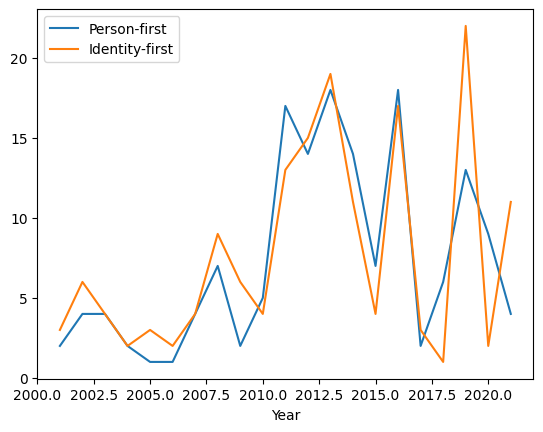

In [27]:
person_identity_count.plot()
plt.show()

## Word counts by part of speech


In [ ]:
POS_p_i = []

for token in p_i_doc:
    this_token = [token.text, token.lemma_, token.pos_, token.tag_]
    if any (s in token.text for s in ['autistic', 'Autistic', 'autism', 'Autism', 'ASD', 'asd', 'Asperger', 'asperger']):
        POS_p_i.append(this_token)

In [ ]:
with open('..\\counts\\ESHG\\POS.csv', "w", encoding='utf8') as outfile:
        write = csv.writer(outfile)
        for item in POS_p_i:
            write.writerow([item])

In [ ]:
p_f_lower = [word.lower() for word in person_first]     # make those tokens lowercase
p_f_no_punct = [w.translate(table_punctuation) for w in p_f_lower] # remove the punctuation
p_f_no_space = (list(filter(lambda x: x, p_f_no_punct)))           # remove any extra whitespace

In [ ]:
#for saving output
os.makedirs('folder/subfolder', exist_ok=True)  
df.to_csv('folder/subfolder/out.csv') 